                        Programa de Pos graduação em Computação Aplicada – PPCA (UnB)


### Nome: Nicola Defonte | Matrıcula: 231108829


                                 ### Prova final de AEDI - Questão 1 ###


O exercıcio 1 da Prova Final irà se basear na aplicação pratica de um problema de Ciencia de Dados em Regressão Linear. Esses problemas são originados de dados reais aplicados em problemas de Negocios. A Tarefa irà abordar a aplicação do problema Venda de Casas em King County (USA). Esse problema trata-se do objetivo de encontrar um modelo que seja capaz de prever e explicar o fenomeno de precificação de venda de imoveis na região de King County (USA). Com esses dados pede-se: <br>

a) Elaborar uma analise descritiva da base de dados, analise grafica e por tabelas. (20%) <br>
b) Gerar o modelo de Regressão Linear e os valores sumarizados do modelo. (30%) <br>
c) Interpretar os resultados levando-se em consideração os pressupostos de regressão linear. (30%)<br>
d) Corrigir os problemas dos pressupostos de regressão e gerar o modelo mais ajustado para os dados. (20%)<br>
e) Interpretar os resultados e evidenciar as principais tomadas de decisoes possıveis com os resultados encontrados. (10%)<br>

                                        ### desenvolvimento ###


In [23]:
#Bibliotecas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

### Explicando as variaveis


*id*:	numero identificativo para cada casa <br>
*date*:	ultima data de venda da casa<br>
*price*:	valor da casa<br>
*bedrooms*:	numero de quartos<br>
*bathrooms*:	numero de banheiros<br>
*sqft_living*:	metro quadrados da casa<br>
*sqft_lot*:	metros quadrados do lote<br>
*floors*:	numero de pisos da casa<br>
*waterfront*:	Casa com vista para a orla<br>
*view*:	foi visto<br>
*condition*: nota do estado geral do imovel<br>
*grade*:	nota geral dada à unidade habitacional, com base no sistema de classificação de King County<br>
*sqft_above*:	Metragem quadrada da casa além do porão<br>
*sqft_basement*:	Metragem quadrada do porão<br>
*yr_built*:	ano de construção<br>
*yr_renovated*:	Ano em que a casa foi reformada<br>
*zipcode*:	Zip code<br>
*lat*:	Coordenadas latitudinais<br>
*long*:	Coordenadas longitudinais<br>
*sqft_living15*:	metragem quadrada da casa em 2015 (implica algumas reformas) <br>
*sqft_lot15*:	metragem quadrada do lote em 2015 (implica algumas reformas)

### Condições:
Para que a regressão linear seja validada de forma correta è preciso atender as seguintes condiçoes:

1. Linearidade: a relação entre as variáveis independentes e a variável dependente deve ser linear;
2. Independência entre as observações: os valores de uma observação não devem ser influenciados pelos valores de outras observações;
3. Ausência de multicolinearidade: as variáveis independentes devem ser pouco correlacionadas entre si;
4. Homocedasticidade: a variância dos erros deve ser constante para todos os níveis das variáveis independentes;
5. Normalidade: os resíduos devem seguir uma distribuição normal com média zero.

### Método

Foi mostrada uma primeira visualização dos dados e da lista das variaveis.<br>

Foram procurados dados nulos e duplicados, não foram encontrados pois o dataset estava limpo.

Em primeira instancia foram descartadas as variaveis que achei que poderiam não ser uteis ao objetivo, sao elas: "id", "date", 'lat', 'long', 'sqft_living15', 'sqft_lot15'. <br>

Subsequentemente houve uma analise da correlação entre as variaveis por meio da *heatmap* e foram encontradas correlaçoes entre a variavel "price" e as variaveis "sqft_living", "grade" e "sqft_above" .<br>

As variaveis foram subdivididas e organizadas por grupos para facilitar as plotagens; a variavel y "price" foi definida como variavel dependente.<br>

Em seguida houve o tratamento, descrição dos dados e visualização. As variaveis com mais diversidade de frequencias foram visualizadas em boxplot para avaliar os outliers. As mesmas foram plotadas cada uma para uma analise visual da distribução de frequencia.
As variaveis com pouca diversidade de valores foram plotadas em countplot.

Foi realizada uma analise em grafico e tabela entre "price" e "grade" para observar como os valores variam ao aumentar ao grau de avaliação do imovel.

Mais uma analise entre "zipcode" e "price" foi realizada em tabela e grafico. O objetivo era verificar se a localização do imovel tem influencia no preço.

Foi plotado o grafico de disperção par a par entre a variavel dependente "price" e as variaveis com mais correlação com ela, com o objetivo de identificar visualmente a presença de linearidade e positividade.

Em seguida foi rodada a função de regressão linear entre a variavel "price", "sqft_living" e "grade". Segue a interpretação dos resultados, mais detalhes serão mostrados mais a frente.<br>

Seguem analises graficas com o uso do test de influencia com criterio de Cooks para a avaliação dos outliers.<br>

Se mostra uma analise grafica assumindo o "sqft_living" como único regressor. <br>

Foi rodado o teste estatistico para a avaliação do requisido de homocedasticidade, *Teste Breusch e Pagan*.<br>

Foram rodados os testes estatisticos para a avaliação dos requisidos de normalidade, *Shapiro-Wilk test* e *Kolmogorov-Smirnov*.<br>

Os dados iniciais mais os novos dados calculados foram extrapolados e arumados em tabela.<br>

Foram executados os testes para avaliação visual dos requisitos de linearidade, homocedastisidade e normalidade.<br>

O reajuste do modelo foi necessario pois os testes para os requisitos não tiveram sucesso. <br>

Se assumem como variaveis independentes "grade" e "zipcode" com base na analise de dados feita inicialmente. <br>

Foram criadas as variaveis dummies para "zipcode". <br>

Foi rodado o VIF para excluir as variaveis que mais afetam a multicolinearidade.<br>

Foi aplicada a transformação logaritmica da variavel de saida y.<br>

Em seguida foi rodada a função de regressão linear entre a variavel "price", "grade" e "zipcode". Se inclue a interpretação dos resultados, os detalhes serão mostrados em baixo do sumário da regressão.<br>

Foi rodado um primeiro test para a avaliação da normalidade, test estatistico *Anderson-Darling* e um test grafico da distribução dos residuos.
Apesar do resultado do test que rejeita a hipotese de normalidade nos vamos assumir normalidade.  <br>

Foi rodado o test de *Cook* de influencia dos outliers e com base nesse test foram eliminados os dados com mais influencia.<br>

Foi rodada novamente a regressão linear com a base de dados reajustada e os resultados foram arrumados no dataframe.<br>

Segue a avaliação dos requisidos de normalidade, linearidade e homocedasticidade com testes estatisticos e visuais.
A hipotese de normalidade foi novamente rejeitada. As hipoteses de linearidade e homocedasticidade não foram rejeitadas.<br>

Houve a avaliação final do modelo com pratica de machine learning com o objetivo de avaliar o desempenho do modelo e avaliar se houve presença de overfitting por meio do calculo do MSE.<br>

Uma tabela de resumo foi mostrada incluindo as previsoes dos preços para cada grau e localização das casas.



### Leitura dos Dados


Criando o dataframe do dataset e visualizando as variaveis de cada coluna.

In [2]:
data = pd.read_csv('kc_house_data.csv', sep = ',', header = 0)

print(data.shape)
print(list(data.columns))

(21613, 21)
['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


Mostrando o dataset

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Procurando linhas duplicadas e mostrandoas na tabela.

In [4]:
data.duplicated().value_counts()

False    21613
dtype: int64

Não tens linhas duplicadas.

In [5]:
#Procurando colunas com valores Nan

data.isnull().sum(axis = 0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

O set de dados não possue valores nulos.

Mostrando os valores únicos para cada variavel e os tipos pela identificação das variaveis.

In [6]:
data_uni_dty = pd.concat([d.reset_index(drop=False) for d in [data.nunique(), data.dtypes]], axis=1)
data_uni_dty = data_uni_dty.transpose()
data_uni_dty = data_uni_dty.drop_duplicates().transpose()
data_uni_dty.columns = ['variaveis','unique','dtype']
data_uni_dty

,variaveis,unique,dtype
0,id,21436,int64
1,date,372,object
2,price,4028,float64
3,bedrooms,13,int64
4,bathrooms,30,float64
5,sqft_living,1038,int64
6,sqft_lot,9782,int64
7,floors,6,float64
8,waterfront,2,int64
9,view,5,int64


In [7]:
# Discarte das variaveis não necessarias

data = data.drop(["id", "date",'lat','long','sqft_living15','sqft_lot15'], axis = 1)

<Axes: >

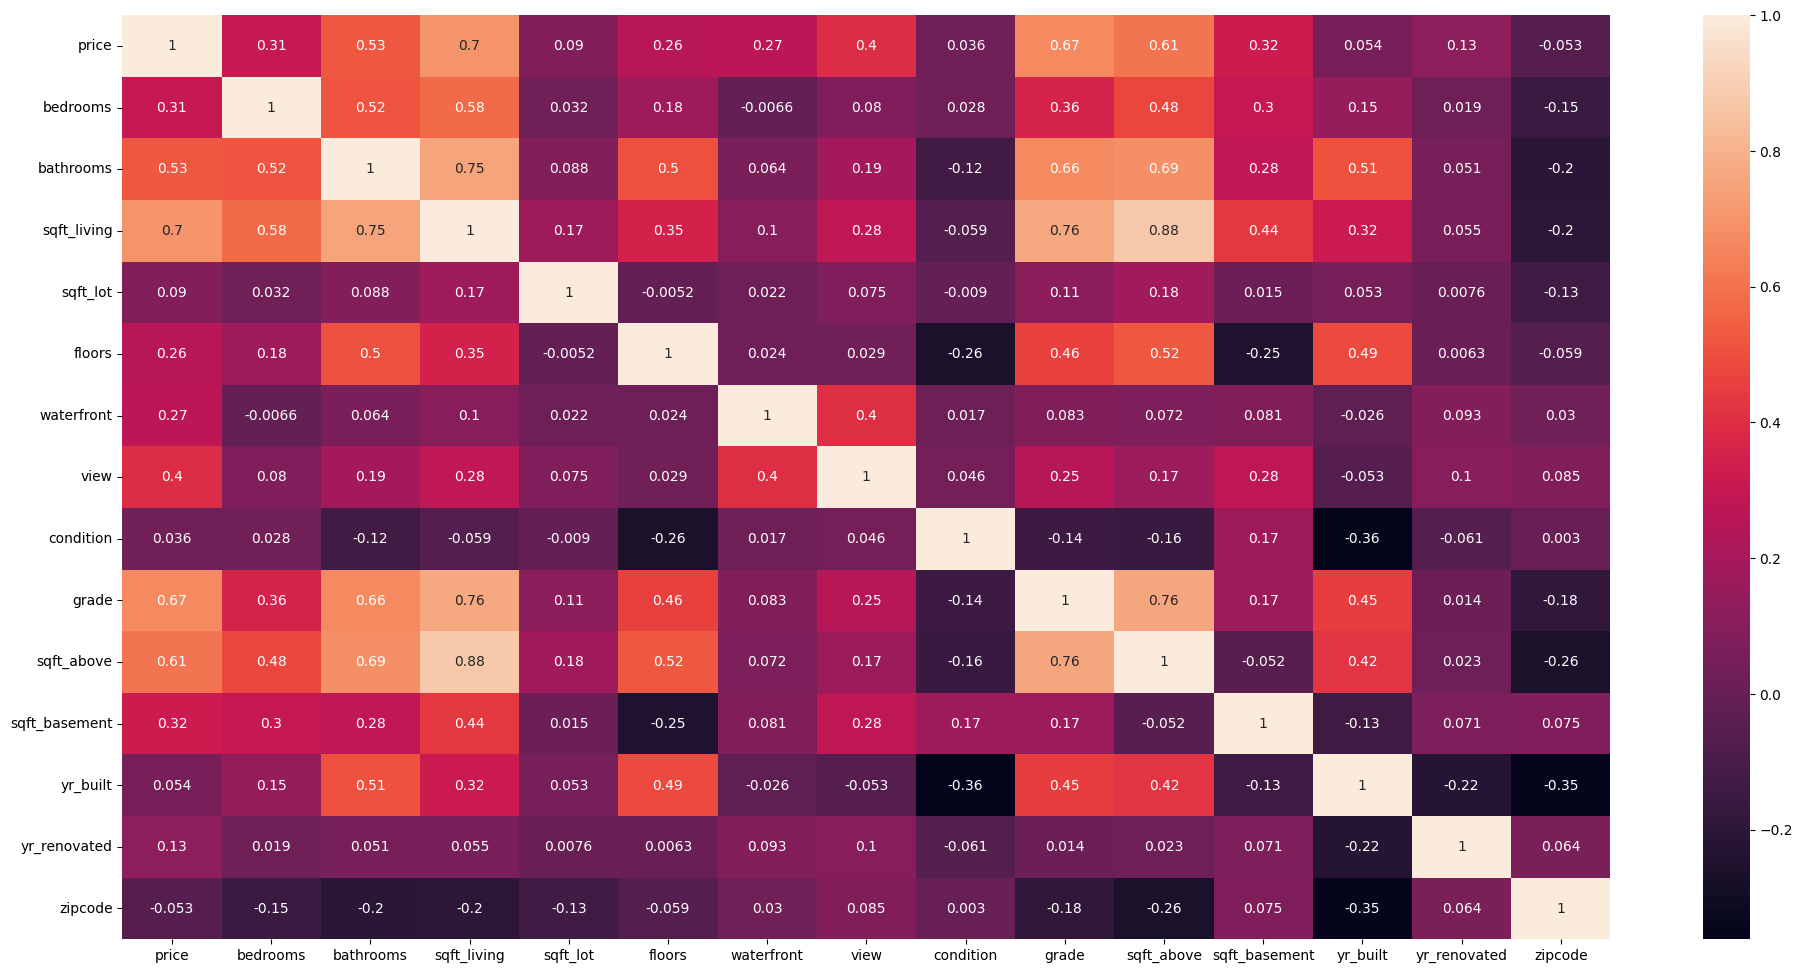

In [8]:
#Heatmap with the correlation values
heat_data = data.copy()
plt.figure(figsize = (24, 12))
sns.heatmap(heat_data.corr(), annot=True)

Foram enconrados um valor alto de correlação entre a variavel dependente "price" e algumas variaveis independentes quais: "sqft_living", "grade", "sqft_above".

In [9]:
# Divisão dos dados

#Definição da variavel dependente
var_dep_y = "price"

#Divisão em grupos das variaveis
data_sel_x = data.copy()
data_sel_x = data_sel_x.filter(['sqft_living','grade'])

data_sel_x_price = data.copy()
data_sel_x_price = data_sel_x_price.filter(['price', 'sqft_living','grade'])

### Plot dos Dados

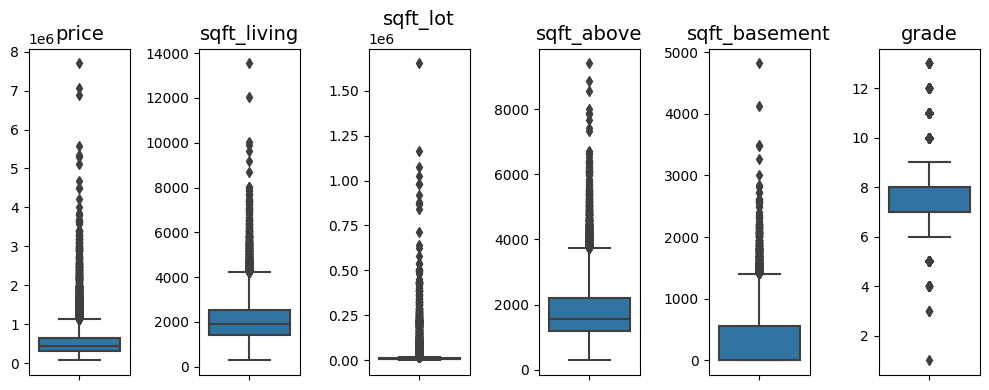

In [10]:
# Seleçao das columnas para box plot
cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','grade']

# Criando subplots
fig, axes = plt.subplots(1, len(cols), figsize=(10, 4))

# Generate boxplots for each column
for i, col in enumerate(cols):
    sns.boxplot(y=col, data=data, ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

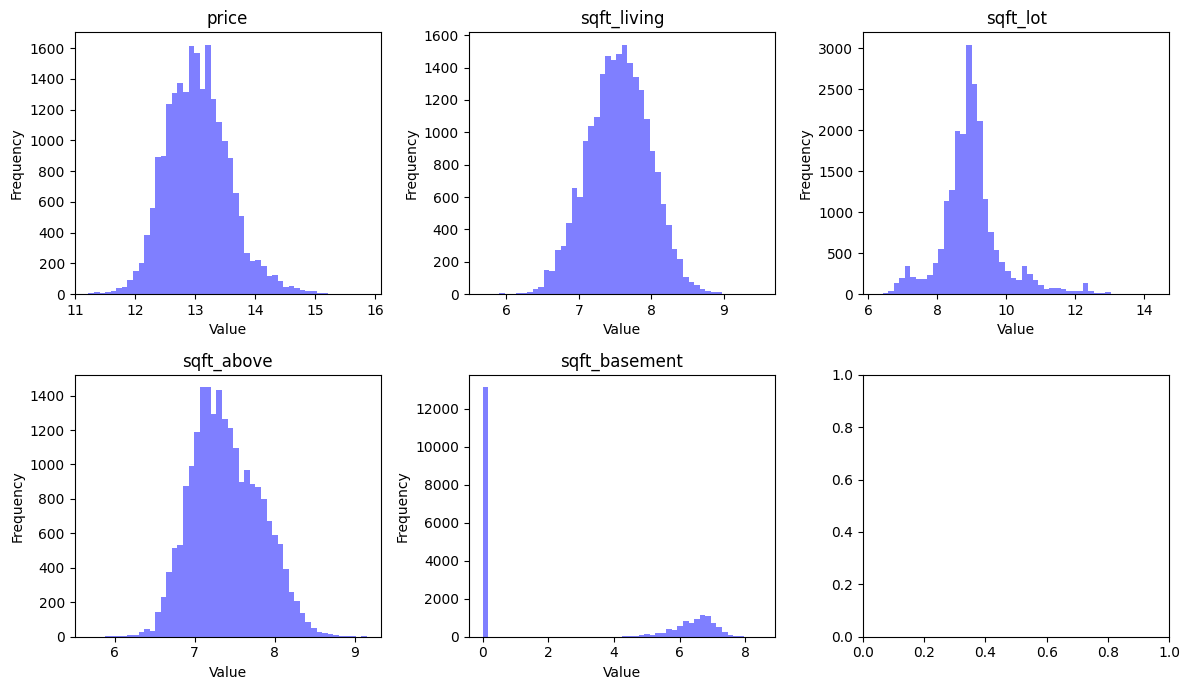

In [11]:
# Plotando as distribuçoes de frequencias
skewed_feats = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
log_df = data.copy()

# Log-transform skewed features
for feat in skewed_feats:
    log_df[feat] = np.log1p(log_df[feat])

# Visualize the distribution of transformed features
fig, axs = plt.subplots(2, 3, figsize=(12,7))
axs = axs.ravel()
for i, feat in enumerate(skewed_feats):
    axs[i].hist(log_df[feat], bins=50, color='blue', alpha=0.5)
    axs[i].set_title(feat, fontsize=12)
    axs[i].set_xlabel('Value', fontsize=10)
    axs[i].set_ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()

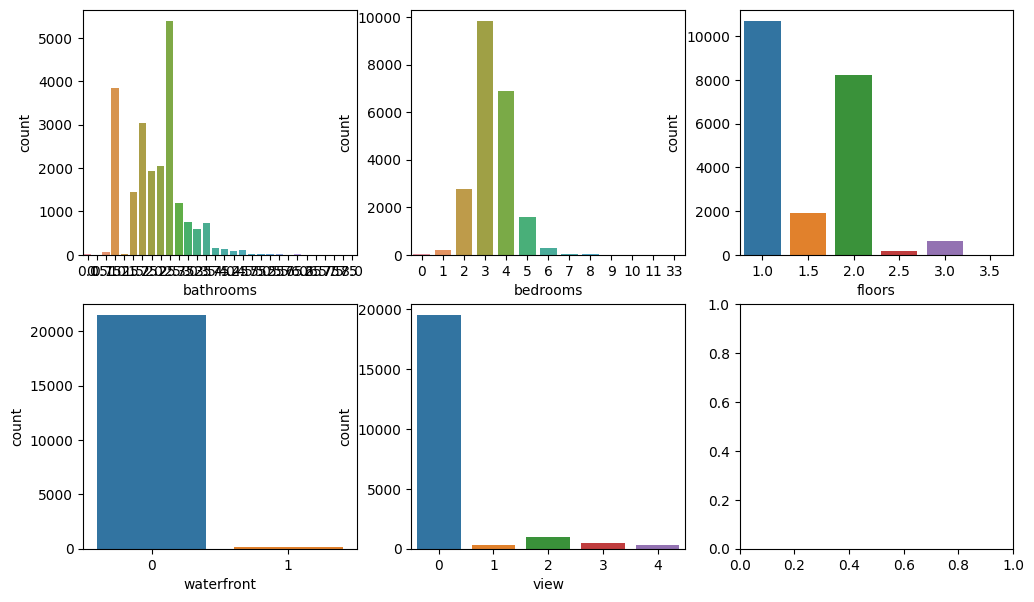

In [12]:
# Plotando as distribuçoes de frequencias
cat_data_plot = ['bathrooms', 'bedrooms','floors','waterfront','view']
#data_canc = data[data['is_canceled'] == 1]
fig, axarr = plt.subplots(2, 3, figsize=(12, 7))
for s in range(0, 3):
    sns.countplot(x=cat_data_plot[s], data = data, ax=axarr[0,s])
for s in range(3, len(cat_data_plot)):
    sns.countplot(x=cat_data_plot[s], data = data, ax=axarr[1,s-3])

#### Analises por graus das casas

Se observa no grafico a proporção direita crescente entre os preços e os graus de avaliação.

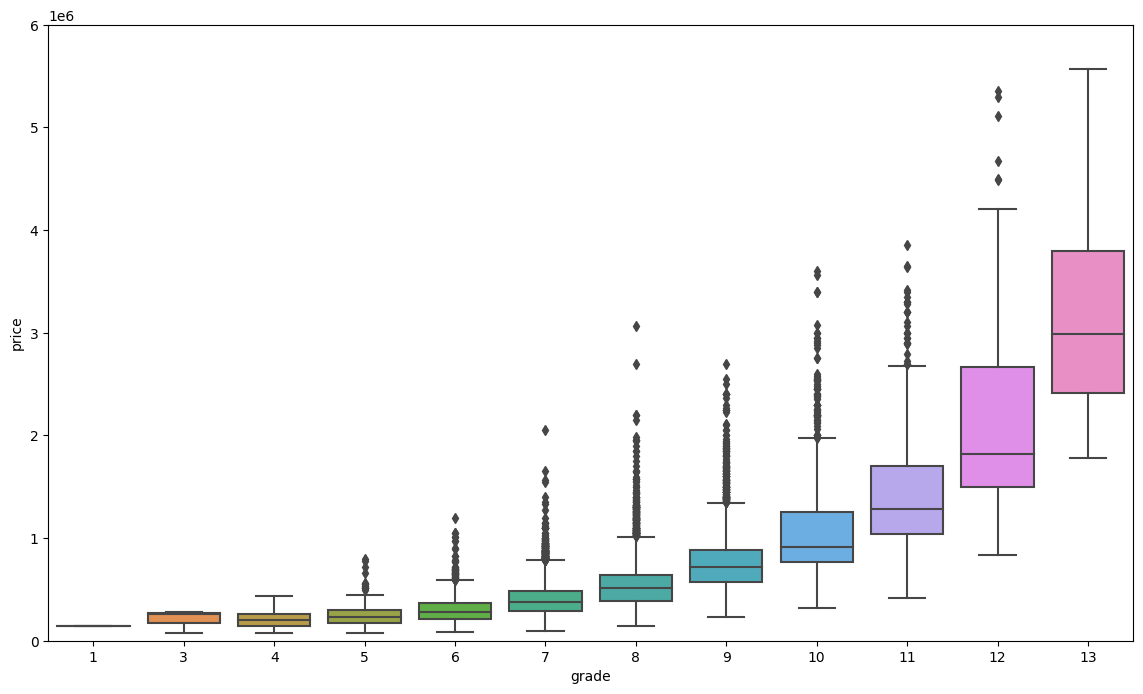

In [13]:
#Plotando os dados por grau

var = 'grade'
data_box_plot = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="price", data=data_box_plot)
fig.axis(ymin=0, ymax=6000000);

In [14]:
# Mostrando os dados por grau

data_grade = data.copy()
data_grade = data.drop(columns=['yr_built',	'yr_renovated',	'zipcode'])
data_grade = data_grade.groupby('grade').mean()
data_grade

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement
grade,,,,,,,,,,,
1,1.420000e+05,0.000000,0.000000,290.000000,20875.000000,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000
3,2.056667e+05,1.000000,0.250000,596.666667,26953.000000,1.000000,0.000000,0.000000,3.333333,596.666667,0.000000
4,2.143810e+05,1.482759,0.905172,660.482759,22101.482759,1.034483,0.000000,0.137931,3.103448,653.586207,6.896552
5,2.485240e+05,2.388430,1.113636,983.326446,24019.909091,1.086777,0.016529,0.136364,3.491736,944.607438,38.719008
6,3.019196e+05,2.685967,1.243499,1191.561335,12646.953876,1.108685,0.005888,0.092738,3.539745,1068.647694,122.913641
7,4.025903e+05,3.255651,1.829251,1689.400401,11766.438481,1.297406,0.002561,0.099766,3.491259,1408.529562,280.870838
8,5.428528e+05,3.479895,2.348179,2184.748517,13510.186552,1.668177,0.006592,0.246539,3.355471,1867.411668,317.336849
9,7.735132e+05,3.773231,2.664340,2868.139962,20638.515488,1.849140,0.009560,0.429446,3.266157,2554.395411,313.744551
10,1.071771e+06,3.907407,3.006393,3520.299824,28191.063492,1.892857,0.024691,0.654321,3.232804,3112.086420,408.213404


#### Analise por area de endereço, zipcode.

7.656873178179799


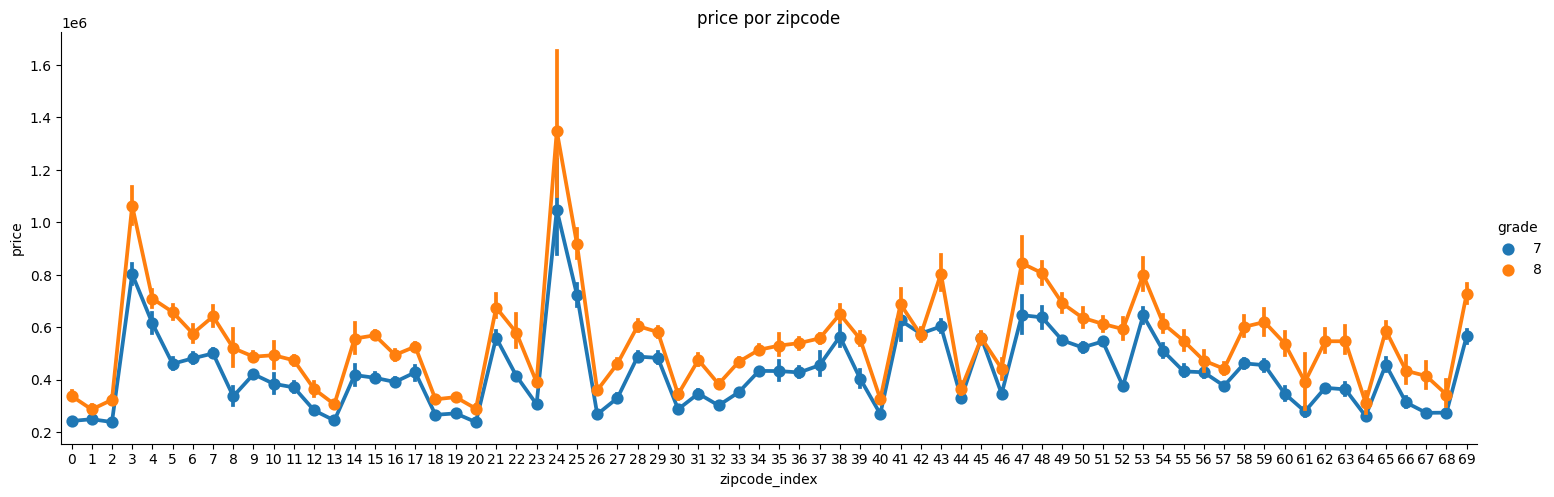

,zipcode,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
zipcode_index,,,,,,,,,,,,,,,
20,98032.0,2.556864e+05,3.527778,1.787037,1791.342593,9601.027778,1.226852,0.000000,0.055556,3.611111,7.333333,1460.138889,331.203704,1970.018519,37.018519
21,98033.0,6.100859e+05,3.402439,2.034553,1905.243902,10418.691057,1.308943,0.004065,0.174797,3.662602,7.430894,1603.943089,301.300813,1971.097561,137.747967
22,98034.0,4.519315e+05,3.457516,2.018519,1812.457516,8685.407407,1.235294,0.006536,0.080610,3.407407,7.224401,1491.873638,320.583878,1974.300654,17.313725
23,98038.0,3.376697e+05,3.413793,2.359375,2005.282328,20514.368534,1.737069,0.000000,0.000000,3.200431,7.368534,1914.118534,91.163793,1996.092672,34.465517
24,98039.0,1.219857e+06,3.428571,2.000000,2229.285714,12945.142857,1.214286,0.000000,0.357143,3.571429,7.571429,1703.571429,525.714286,1948.500000,566.285714
25,98040.0,8.591390e+05,3.695238,2.195238,2324.476190,11945.104762,1.185714,0.009524,0.333333,3.847619,7.704762,1852.666667,471.809524,1962.123810,228.057143
26,98042.0,3.005957e+05,3.422897,2.176402,1944.649533,17331.000000,1.521028,0.000000,0.023364,3.476636,7.350467,1805.023364,139.626168,1988.100467,37.266355
27,98045.0,3.801407e+05,3.182390,2.015723,1828.270440,21234.616352,1.443396,0.000000,0.119497,3.163522,7.377358,1711.603774,116.666667,1985.044025,50.094340
28,98052.0,5.629295e+05,3.546419,2.200928,2051.506631,9845.267905,1.408488,0.002653,0.034483,3.448276,7.636605,1728.190981,323.315650,1979.954907,26.493369


In [15]:
# calculando o grau medio
grade_mean = data.copy()
grade_mean = data['grade'].mean()
print(grade_mean)

# selecting rows based on condition
data_zipcode = data.copy()
data_zipcode = data[(data['grade'] > 6) & (data['grade'] < 9)]

# Criando indices para zipcode
arr = data_zipcode.filter(like='zipcode')
zip_index = pd.DataFrame(np.unique(arr, return_inverse=True)[1].reshape(arr.shape),
             index=arr.index,
             columns=arr.columns)
data_zipcode['zipcode_index'] = zip_index
data_zipcode.insert(0, 'zipcode', data_zipcode.pop('zipcode'))

# plotando price por zipcode
sns.catplot(x="zipcode_index", y="price", hue= 'grade', data=data_zipcode, kind="point", height=5, aspect=3)
plt.title('price por zipcode')
plt.show()

# mostrando os dados
data_zipcode.groupby('zipcode_index').mean().loc[20:30]


**Plotando os dados par a par e procurando linearidade e positividade entre os pares.**

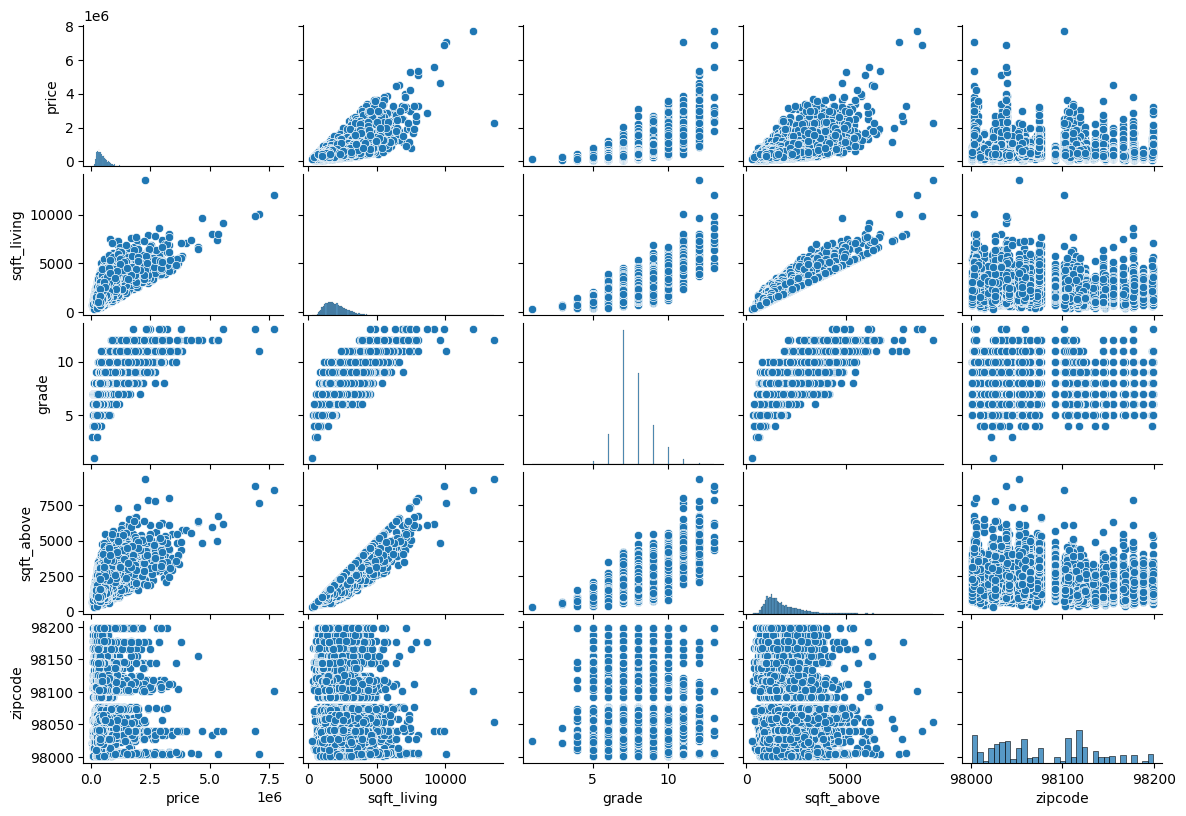

In [16]:
dataset_BB = data.filter(['price','sqft_living','grade','sqft_above', 'zipcode'])
figure_BB = sns.pairplot(dataset_BB)
figure_BB.fig.set_size_inches(12,8)

**Observaçcão da disperção dos dados da variavel sqft_living**

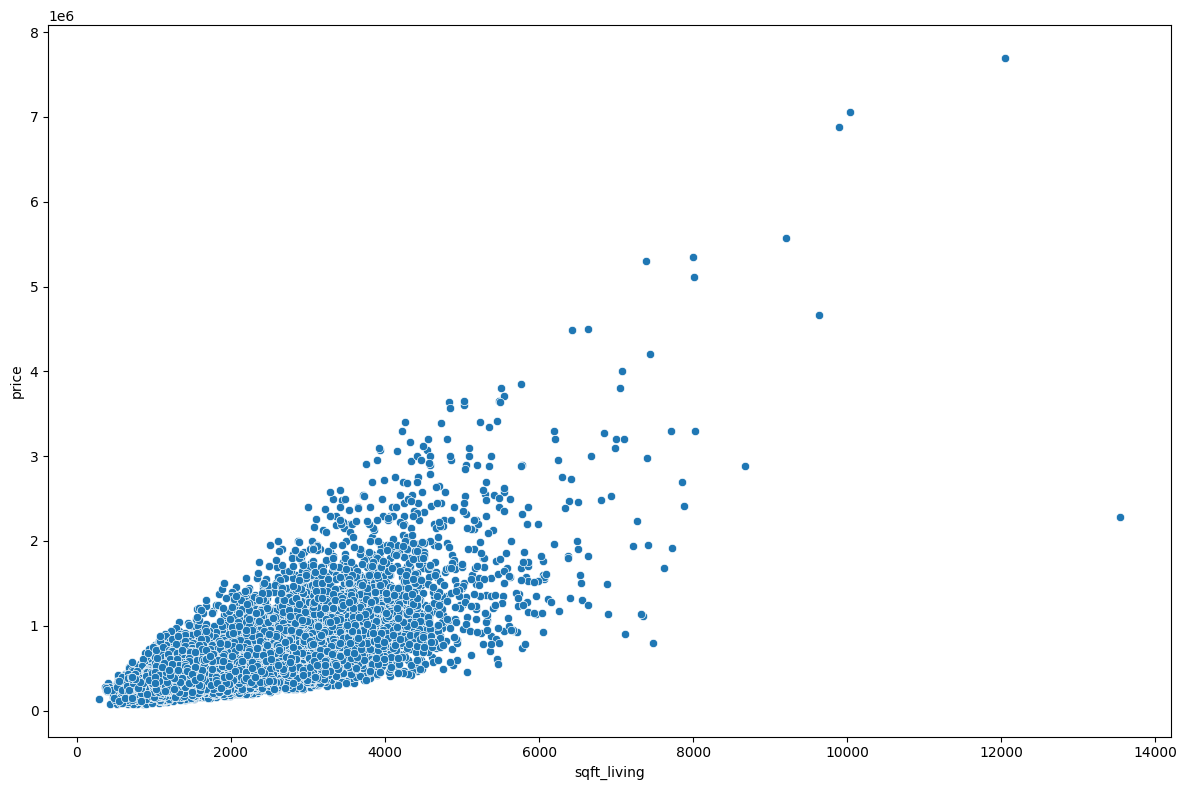

In [17]:
x = data['sqft_living'] # independent variable

y_BB = data['price'] # dependent variable

# Plot da disperção entre as variaveis

plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=x, y=y_BB)
plt.show()


## Regressão Linear

In [18]:
x = data_sel_x # independent variable constant
features = sm.add_constant(x)

Y = (data['price'])

lm = sm.OLS(Y, features).fit()

print(lm.predict(features))

0        309390.443690
1        565734.529808
2        135223.361157
3        453238.204245
4        500155.344748
             ...      
21608    472492.313872
21609    616340.074428
21610    279883.210755
21611    485401.728281
21612    279883.210755
Length: 21613, dtype: float64


In [19]:
features

,const,sqft_living,grade
0,1.0,1180,7
1,1.0,2570,7
2,1.0,770,6
3,1.0,1960,7
4,1.0,1680,8
...,...,...,...
21608,1.0,1530,8
21609,1.0,2310,8
21610,1.0,1020,7
21611,1.0,1600,8


Rodando o método de reversão a média ou regressão linear com estimação via Mínimos Quadrados Ordinários.

In [20]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:25:24   Log-Likelihood:            -2.9934e+05
No. Observations:               21613   AIC:                         5.987e+05
Df Residuals:                   21610   BIC:                         5.987e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.981e+05   1.33e+04    -44.978      

O $R^2$ indica como a combinação das variaveis "grade" e "sqft_living" explicam a variabilidade do "price". O valor de $R^2$ encontrado indica que o 0,535% da variabilidade do preço està explicada pelas variaveis independentes.

A variabilidade de pelo menos uma das duas variaveis explica a relação com a variavel dependente pois o *Prob (F-statistic) = 0*, sendo a hipotese *P < 0.5*. <br>

Os coefficientes:<br>
o P-value dos dois coefficientes tem *P-value = 0* o que indica que esses dados são estatisticamente significativos pois o valor è menor de 0.05.
<br>

Os testes:<br>
O test *Jarque-Bera* indica não normalidade dos erros. A hipotese nula $H_0$ è rejeitada por causa do *P value = 0* encontrado nos resultados.
Tambem os valores de *Skew* e *Kurtosis* deveriam ser a cerca de 0 para que a hipotese nula não seja rejeitada.
Os valores encontrados sugerem a presença de grande aglomeração de dados proximos da media e de caudas devidas aos outliers. Tambem tem indicação de assimetria.
Esses testes não indicam distribução de normalidade.<br>

O test de *Durbin-Watson* nos devolveu um valor encontrado de 1,977.
Esse test busca a presença de autocorrelação entre os dados.
Geralmente, um valor acerca de 2 indica a falta de autocorrelação entre os residuos, portanto a condição è respeitada. <br>

O *Cond. No (condition number)* avalia a multicolinearidade (dependência linear) entre as variáveis independentes. O valor encontrado 1.80e+04 indica a presença de multicolinearidade.<br>

**Rodando o Influence Plot** para identificar as observaçoes nas variaveis independentes que possuem valores com alto impacto respeito aos outros valores.

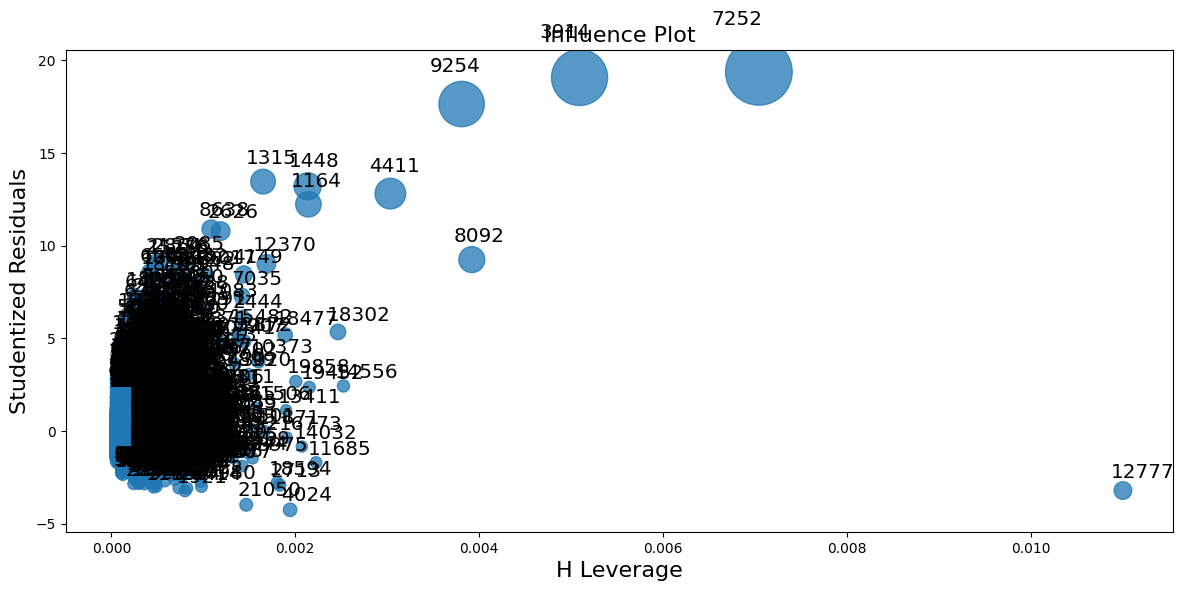

In [21]:
# Test de Cook - influence plot

fig = sm.graphics.influence_plot(lm, criterion="cooks")
fig.set_size_inches(12, 6)
plt.tight_layout(pad=1.0)

Se podem identificar os outliers que tem mais impacto na variabilidade.
De fato quanto mais distante, maior serà a variabilidade; quanto maior è a bola maior serà o impacto dos outlyers na variabilidade.

No Grafico è possivel observar varios erros que estão variando muito por exemplo o 7252 que apesar de ser menos distante do 12777 tem mais impacto na variabilidade.

**Plotando e assumindo o "sqft_living" como único regressor.**

No primeiro grafico da pra observar a distancias dos erros dos pontos vermelhos que rapresentam a linea reta.

No segundo grafico a relação dos residuos (os erros) com o "sqft_living" è zero que è de fato o valor esperado.

eval_env: 1


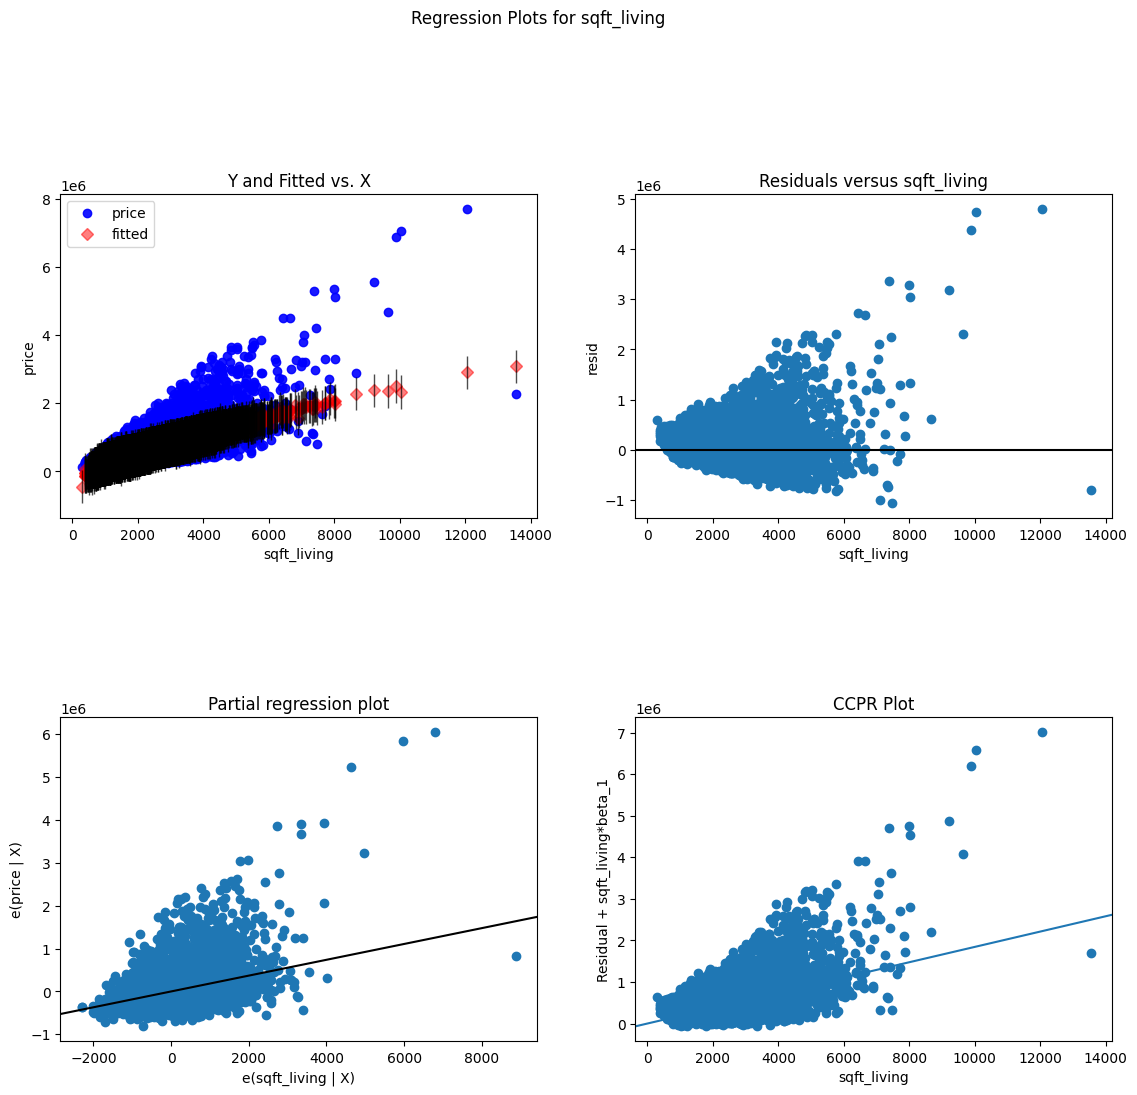

In [22]:
fig = sm.graphics.plot_regress_exog(lm, exog_idx='sqft_living')
fig.tight_layout(pad=1.0)
fig.set_size_inches(12,12)


**Rodando o test: *Breusch-Pagan Lagrange Multiplier test*.**<br>
O objetivo è testar se tem differencias de variancias.<br>
Se assume a seguinte hipotese $H_0$: Homocedasticidade. <br>
Por tanto se um dos valores e.g. *P-value > 0,05* então a hipotese *$H_0$* não pode ser rejeitada, em caso contrario se *P-value < 0,05* terà indicação de heterocedasticidade.<br><br>

In [23]:
# Teste Breusch e Pagan de Heterocedasticidade

name = ['Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade ',
        'p-value', 'f-value', 'f: p-value']
test = sm.stats.het_breuschpagan(lm.resid, lm.model.exog)
lzip(name, test)

[('Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade ',
  2109.5979405263433),
 ('p-value', 0.0),
 ('f-value', 1168.7297261205258),
 ('f: p-value', 0.0)]

Os *P-values* obtidos indicam que tem alta probabilidade de Heterocedasticidade.

**Rodando mais testes de normalidade**

In [24]:
# Shapiro-Wilk test
from scipy.stats import shapiro

w, pvalue = stats.shapiro(lm.resid)
print('Statistics= %.3f, pvalue=%.3f' % (w, pvalue))
# interpret
alpha = 0.05
if pvalue > alpha:
	print('Resíduo com Distribuição Normal (Não rejeita H0)')
else:
	print('Diferente da Normal (rejeita H0)')

Statistics= 0.817, pvalue=0.000
Diferente da Normal (rejeita H0)


In [25]:
# perform the Kolmogorov-Smirnov test on the residuals
k_statistic, pvalue = stats.kstest(lm.resid, 'norm')

# print the results and interpret
alpha = 0.05
if pvalue > alpha:
    print('Resíduo com Distribuição Normal (Não rejeita H0)')
else:
    print('Diferente da Normal (rejeita H0)')

print('K-S Statistic= %.3f, pvalue=%.3f' % (k_statistic, pvalue))

Diferente da Normal (rejeita H0)
K-S Statistic= 0.554, pvalue=0.000


## Mostrando os valores de previsão $Y_i$ <br>
$Y_i = β_1 + β_2X_i + β_3X_i + u_i$

In [26]:
# Mostrando as previsoes e os residuos

df_final = features.copy()
df_final['Y'] = data['price']
df_final['y_pred'] = lm.predict(features)
df_final['residual'] = lm.resid
print(df_final)

       const  sqft_living  grade         Y         y_pred       residual
0        1.0         1180      7  221900.0  309390.443690  -87490.443690
1        1.0         2570      7  538000.0  565734.529808  -27734.529808
2        1.0          770      6  180000.0  135223.361157   44776.638843
3        1.0         1960      7  604000.0  453238.204245  150761.795755
4        1.0         1680      8  510000.0  500155.344748    9844.655252
...      ...          ...    ...       ...            ...            ...
21608    1.0         1530      8  360000.0  472492.313872 -112492.313872
21609    1.0         2310      8  400000.0  616340.074428 -216340.074428
21610    1.0         1020      7  402101.0  279883.210755  122217.789245
21611    1.0         1600      8  400000.0  485401.728281  -85401.728281
21612    1.0         1020      7  325000.0  279883.210755   45116.789245

[21613 rows x 6 columns]


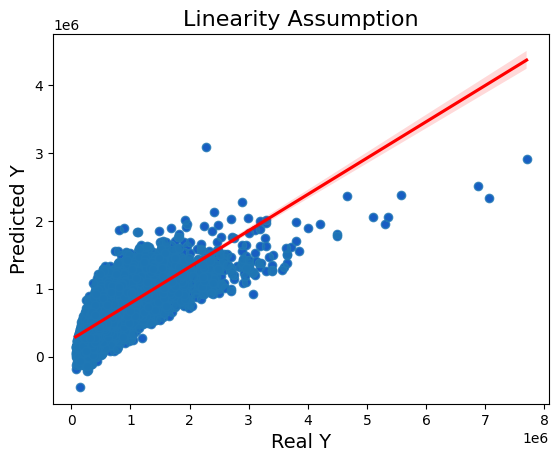

In [27]:
# Grafico de linearidade

sns.scatterplot(x=df_final.Y, y=df_final.y_pred, color='blue')
sns.regplot(x=df_final.Y, y=df_final.y_pred, line_kws={'color':'red'})
plt.ylabel('Predicted Y', fontsize=14)
plt.xlabel('Real Y', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


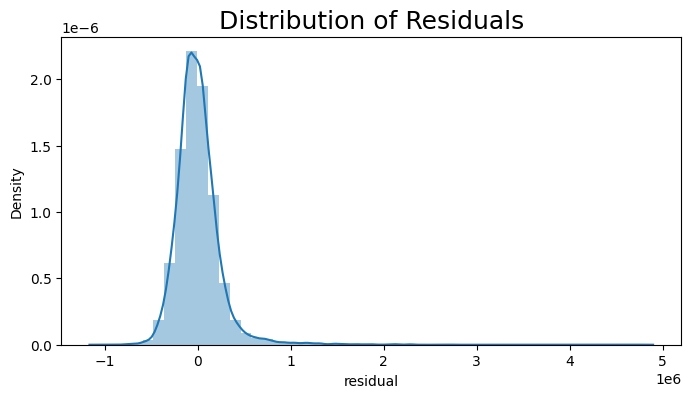

Residuals are not normally distributed


In [28]:
# Test grafico e estatistico de normalidade

from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_final['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df_final['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')


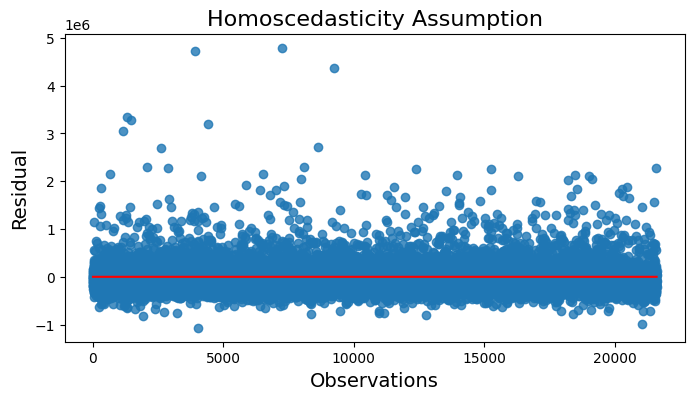

In [29]:
# Plotando os residuos para avaliação de homocedasticidade
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_final.index, y=df_final.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_final.index)), color='red', linestyle='-')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Observations', fontsize=14)
plt.title('Homoscedasticity Assumption', fontsize=16)
plt.show()

## Conclusões provisórias

Os testes estatisticos e visuais realizados mostram que:<br>

houve distibução diferente da normal;<br>
foi detectada heterocedasticidade;<br>
a linearidade entre variaveis x e y não foi respeitada;<br>
houve presença de multicolinearidade.<br>

No modelo atual 4 das 5 condiçoes iniciais da regressão linear não foram respeitadas.<br>
E' preciso adjustar o modelo.<br>


## Reajuste do modelo

O reajuste do modelo prevê uma mudança nas variáveis ​​de entrada após uma cuidadosa análise preliminar dos dados relativos à área residencial ("zipcode") e ao grau da casa ("grade").<br>

Para aprimorar o modelo, foram introduzidas ferramentas como: a transformação logarítmica da variável dependente, o Variance Inflation Factor (VIF) que é uma medida utilizada na regressão linear para avaliar a multicolinearidade entre as variáveis ​​preditoras. <br>

Por fim, foi utilizada uma técnica de eliminação de outliers segundo o critério de Cook.



In [30]:
# Criando dummies para zipcode

data_zipcode = data.copy()

cat_vars=['zipcode'
         ]
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_zipcode[var], prefix=var, dtype=int)
    data1=data_zipcode.join(cat_list)
    data_zipcode=data1
cat_vars=['zipcode'
         ]
data_vars=data_zipcode.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]


In [31]:
# Criando o dataframe de ajuste
adjusted_data = data_zipcode.copy()

# Selecionando as variaveis x
zipcode_columns = data_zipcode.filter(like='zipcode_')
grade_columns = data_zipcode.filter(['grade'])

# juntando as variaveis x
adj_sel_x_var = pd.concat([grade_columns, zipcode_columns], axis=1)

# Selecionando a variavel y
adj_sel_y_var = adjusted_data.filter(['price'])

adj_sel_x_var

,grade,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,8,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Rodando o VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = adj_sel_x_var

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort the VIF values in descending order
vif_sorted = vif.sort_values(by='VIF', ascending=False)

In [33]:
# Print the sorted VIF values
vif_sorted.head(15)

,Variable,VIF
6,zipcode_98006,2.684403
29,zipcode_98052,2.684149
24,zipcode_98038,2.488740
38,zipcode_98074,2.462774
43,zipcode_98103,2.445424
50,zipcode_98115,2.381587
23,zipcode_98034,2.342733
27,zipcode_98042,2.321059
52,zipcode_98117,2.282228
34,zipcode_98059,2.274897


A escolha das variáveis ​​eliminadas foi feita após várias tentativas, adicionando uma variável por vez até que o teste de multicolinearidade fosse satisfeito.

In [34]:
adj_sel_x_var = adj_sel_x_var.drop(columns=['zipcode_98006','zipcode_98052','zipcode_98038','zipcode_98074','zipcode_98103',
                                            'zipcode_98115','zipcode_98034','zipcode_98042',
                                            ])
adj_sel_x_var

,grade,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,8,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Apply Logarithmic transformation to the y data
adj_sel_y_var = np.log10(adj_sel_y_var)

Aplicou-se a transformação logarítmica da variável dependente, pois observou-se que o indicador R ao quadrado melhorou junto com o viés dos dados.

In [36]:
# Linear regression com Log10

adj_x = adj_sel_x_var # independent variable constant
adj_features = sm.add_constant(adj_x)

adj_Y = (adj_sel_y_var)
adj_lm = sm.OLS(adj_Y, adj_features).fit()

print(adj_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     920.5
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:28:35   Log-Likelihood:                 15329.
No. Observations:               21613   AIC:                        -3.053e+04
Df Residuals:                   21549   BIC:                        -3.002e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.8330      0.006    770.482

Resultados

O valor atual do $R^2$ de 72.9% teve uma melhoria muito grande apos os ajustes. <br>

Alguns dos coeficientes apresentam um P-value > 0.05. Foi testada a remoção dessas variaveis mas não houve mudanças nos resultados dos testes.

Apesar do test de *Jarque-Bera* não indicar normalidade os valores quais *Skew* e *Kurtosis* são bem melhores e parecem valores mais pertos do que uma distribução normal deveria possuir. <br>

Também o indice de multicolinearidade (*Cond. No*) caiu drasticamente indicando a pequena presença, entre os limites, de multicolinearidade.

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


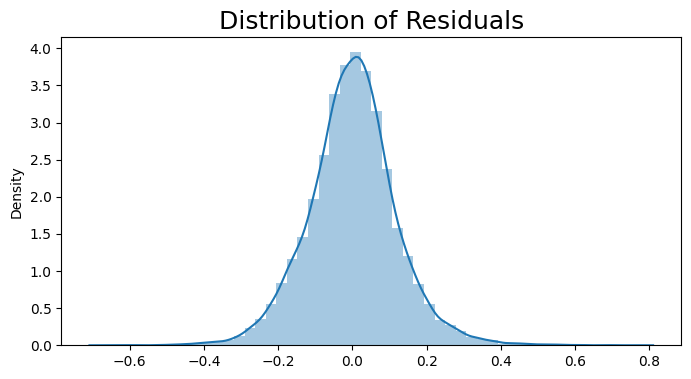

Residuals are not normally distributed


In [37]:
# test de normalidade Anderson-Darling com grafico

from statsmodels.stats.diagnostic import normal_ad

trans_res = (adj_lm.resid)

# Performing the test on the residuals
p_value = normal_ad(trans_res)[1]

print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot((trans_res))
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

De acordo com os testes accima a distribução dos residuos não houve normalidade, apesar disso para continuar com a costrução do modelo assumiimos normalidade ou simil-normalidade.

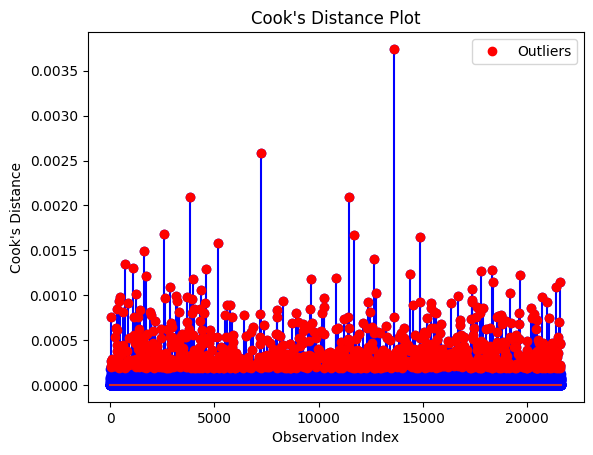

Detected: (1034,)
Indices of outliers: [   21    41    49 ... 21576 21579 21583]


In [38]:
# Test de Cook

from statsmodels.stats.outliers_influence import OLSInfluence

X = adj_features

# Calculate Cook's distances
influence = OLSInfluence(adj_lm)
cooks_d = influence.cooks_distance[0]

# Plot Cook's distances
fig, ax = plt.subplots()
ax.stem(np.arange(len(cooks_d)), cooks_d, markerfmt='o', linefmt='b-')
ax.set_xlabel('Observation Index')
ax.set_ylabel("Cook's Distance")
ax.set_title("Cook's Distance Plot")

# Highlight observations with high Cook's distances
outlier_threshold = 4 / len(X)
outliers = np.where(cooks_d > outlier_threshold)[0]
ax.plot(outliers, cooks_d[outliers], 'ro', label='Outliers')
ax.legend()

plt.show()

# Print the indices of the outliers
print("Detected:", outliers.shape)
print("Indices of outliers:", outliers)


In [39]:
# Eliminação dos outliers

from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(adj_lm)
cooks_d = influence.cooks_distance[0]

outlier_threshold = 4 / len(adj_lm.model.exog)  # Set a threshold for Cook's distance

outliers = np.where(cooks_d > outlier_threshold)[0]

X_filtered = np.delete(adj_lm.model.exog, outliers, axis=0)
y_filtered = np.delete(adj_lm.model.endog, outliers)

# Regressão linear sem outliers

adj_lm_cook = sm.OLS(y_filtered, X_filtered).fit()

# Print the filtered data shape
print("Filtered data shape:")
print("X_filtered shape:", X_filtered.shape)
print("y_filtered shape:", y_filtered.shape)

print(adj_lm_cook.summary())

Filtered data shape:
X_filtered shape: (20579, 64)
y_filtered shape: (20579,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1054.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:28:37   Log-Likelihood:                 17284.
No. Observations:               20579   AIC:                        -3.444e+04
Df Residuals:                   20515   BIC:                        -3.393e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

Apos a eliminação dos outliers com o criterio de Cook houve um aumento do $R^2$ ate 76,4%. <br>
Todas as outras medids ficaram similares aos valores anteriores, não teve grande mudanças.

In [40]:
# Criando o dataframe atualizado cook
adj_features_cook = pd.DataFrame()

# Create a DataFrame using the design matrix and feature names
X_filtered = pd.DataFrame(adj_lm_cook.model.exog, columns=['const'] + adj_lm.model.exog_names[1:])

adj_features_cook['adj_Y'] = y_filtered
adj_features_cook['resid'] = adj_lm_cook.resid
adj_features_cook['adj_y_pred'] = adj_lm_cook.predict()
adj_features_cook = pd.concat([adj_features_cook, X_filtered], axis=1)
adj_features_cook = adj_features_cook.rename(columns={0: 'const'})
adj_features_cook


,adj_Y,resid,adj_y_pred,const,grade,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,5.346157,-0.117401,5.463558,1.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,5.730782,0.113965,5.616817,1.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.255273,-0.215762,5.471035,1.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.781037,0.120110,5.660927,1.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.707570,-0.017423,5.724993,1.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20574,5.556303,-0.168691,5.724993,1.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20575,5.602060,-0.013976,5.616036,1.0,8.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20576,5.604335,-0.048115,5.652450,1.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20577,5.602060,-0.129712,5.731772,1.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Testes graficos e estatisticos para checagem das condiçoes iniciais.**

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


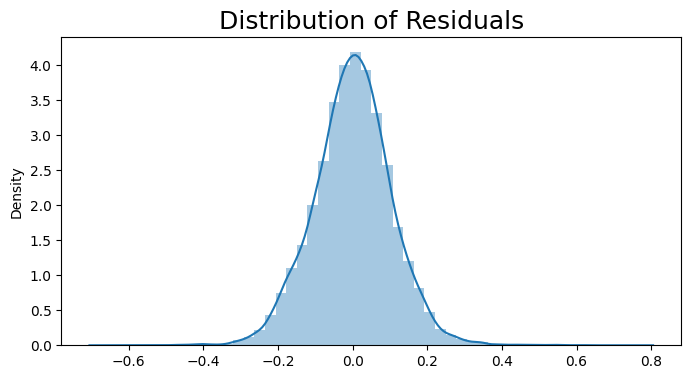

Residuals are not normally distributed


In [41]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad((adj_lm_cook.resid))[1]

print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot((adj_lm_cook.resid))
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

In [42]:
# Shapiro-Wilk test de normalidade
from scipy.stats import shapiro

w, pvalue = stats.shapiro(adj_lm_cook.resid)
print('Statistics= %.3f, pvalue=%.3f' % (w, pvalue))
# interpret
alpha = 0.05
if pvalue > alpha:
	print('Resíduo com Distribuição Normal (Não rejeita H0)')
else:
	print('Diferente da Normal (rejeita H0)')

Statistics= 0.994, pvalue=0.000
Diferente da Normal (rejeita H0)


A distribução segue mostrando caudas grandes e com pico de agregação central que não pertence a distribução normal. <br>
Tambem os testes estatisticos rejeitaram a hipotese de normalidade.

Mean of normalized residuals: 2.0716538289326988e-17
Standard deviation of normalized residuals: 1.0


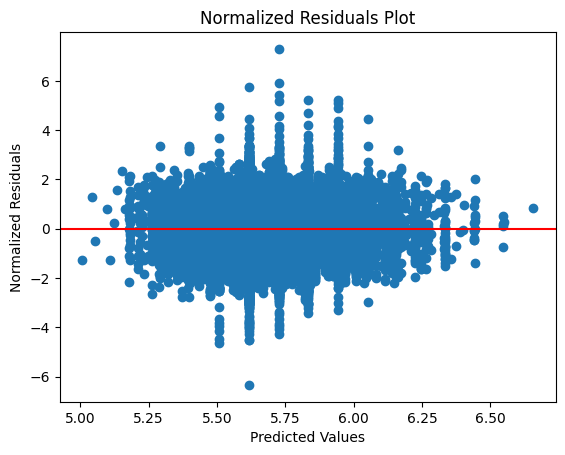

In [43]:
# Normalizando os residuos para avaliação geral da regressão

# Calculate the residuals
residuals = adj_lm_cook.resid

# Normalize the residuals
normalized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

# Print the mean and standard deviation of normalized residuals
print("Mean of normalized residuals:", np.mean(normalized_residuals))
print("Standard deviation of normalized residuals:", np.std(normalized_residuals))


# Plot the normalized residuals
plt.scatter(adj_lm_cook.predict(), normalized_residuals)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Normalized Residuals")
plt.title("Normalized Residuals Plot")
plt.show()

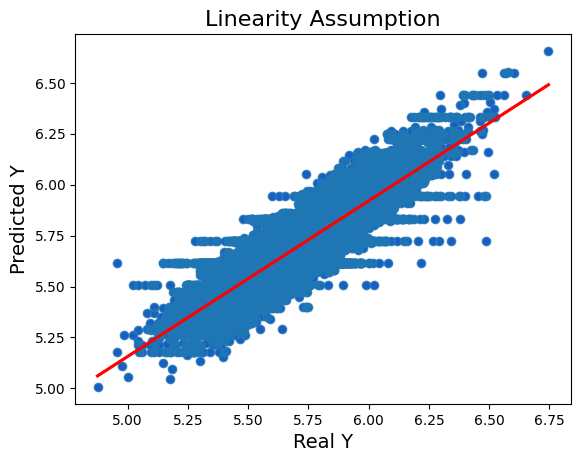

In [44]:
# Test grafico de linearidade

adj_Y = (adj_lm_cook.model.endog)
adj_y_pred = adj_lm_cook.predict()

sns.scatterplot(x=adj_Y, y=adj_y_pred, color='blue')
sns.regplot(x=adj_Y, y=adj_y_pred, line_kws={'color':'red'})
plt.ylabel('Predicted Y', fontsize=14)
plt.xlabel('Real Y', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

In [45]:
from statsmodels.stats.diagnostic import linear_rainbow

# Perform Rainbow test for linearity
rainbow_statistic, rainbow_p_value = linear_rainbow(adj_lm_cook)

# Print the results
print("Rainbow Test - Statistic: {:.4f}".format(rainbow_statistic))
print("Rainbow Test - p-value: {:.4f}".format(rainbow_p_value))

Rainbow Test - Statistic: 1.0148
Rainbow Test - p-value: 0.2282


O test estatisticos aceita a hipotese de linearidade do modelo.

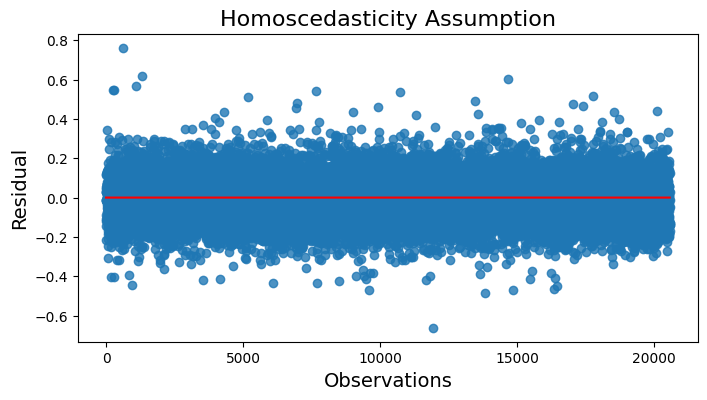

In [46]:
# Plotting the residuals for homoscedasticity
plt.subplots(figsize=(8, 4))
plt.scatter(x=adj_features_cook.index, y=adj_lm_cook.resid, alpha=0.8)
plt.plot(np.repeat(0, len(adj_features_cook.index)), color='red', linestyle='-')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Observations', fontsize=14)
plt.title('Homoscedasticity Assumption', fontsize=16)
plt.show()

In [47]:
# Test estatistico de Heterocedasticidade Breusch e Pagan

name = ['Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade ',
        'p-value', 'f-value', 'f: p-value']
test = sm.stats.het_breuschpagan(adj_lm_cook.resid**10, adj_lm_cook.model.exog)
lzip(name, test)

[('Multiplicador de Lagrange - Teste Breusch e Pagan de Heterocedasticidade ',
  4.406437061983708),
 ('p-value', 1.0),
 ('f-value', 0.06974085677913358),
 ('f: p-value', 0.9999999999999999)]

O test estatistico aceita a hipotese de homocedasticidade dos residuos.

MSE on training set: 0.010957161129677592
MSE on validation set: 0.010767543226162428
R-squared on training set: 0.7635863494244665
R-squared on validation set: 0.7654096987004013


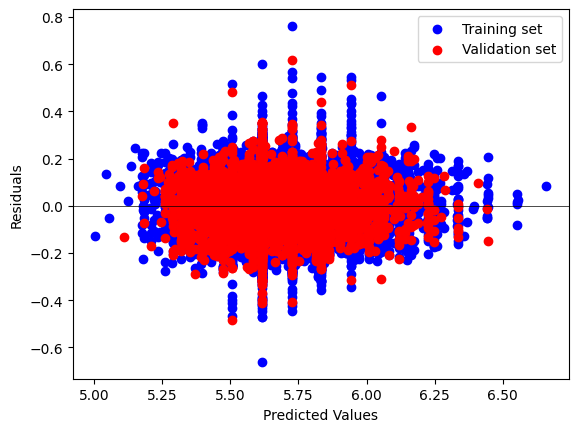

In [48]:
# Avaliação do desempenho do modelo

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate some sample data
np.random.seed(0)
X = adj_lm_cook.model.exog
y = adj_lm_cook.model.endog

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate the mean squared error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)

# Calculate the R-squared value
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

print("MSE on training set:", mse_train)
print("MSE on validation set:", mse_val)
print("R-squared on training set:", r2_train)
print("R-squared on validation set:", r2_val)

# Plot the residuals
residuals_train = y_train - y_train_pred
residuals_val = y_val - y_val_pred

plt.scatter(y_train_pred, residuals_train, c='blue', label='Training set')
plt.scatter(y_val_pred, residuals_val, c='red', label='Validation set')
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()


Pelos resultados obtidos em ambos os MES se pode observar que os dois valores são muito baixos e muito proximos entre eles o que indica um bom desempenho do modelo.

In [49]:
adj_features_cook = adj_features_cook.drop(columns=['const','resid',])

In [50]:
# Mostrando os preços originais com as previsoes

adj_features_cook['adj_y_pred'] = pow(10, adj_features_cook.adj_y_pred)
adj_features_cook['adj_Y'] = pow(10, adj_features_cook.adj_Y)
adj_features_cook = adj_features_cook.rename(columns={'adj_Y': 'price', 'adj_y_pred': 'pred_price'})

In [51]:
# Sort the DataFrame by Grade in ascending order

adj_features_cook_sorted = adj_features_cook.sort_values('grade')
adj_features_cook_sorted


,price,pred_price,grade,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98007,zipcode_98008,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
1106,75000.0,1.016373e+05,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9313,435000.0,1.947936e+05,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13323,130000.0,1.978580e+05,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17292,230000.0,1.706472e+05,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3410,355000.0,1.947936e+05,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,3200000.0,2.536224e+06,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13040,2340000.0,1.858943e+06,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6683,3800000.0,3.554988e+06,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12764,2415000.0,2.052624e+06,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Na tabela compacta acima se mostra a lista dos dados organizados por grau de casa com os preços originais e os preços de previsão para cada localização. <br>
Lembrando que a probabilidade que o endereço e o grau justifiquem os preços previstos è do 76,4%.



**Conclusões finais**
<br>
Esta análise de regressão linear teve como objetivo examinar a relação entre as variáveis ​​preditoras X (grade, zipcode) e a variável alvo Y (price), considerando as suposições de linearidade, homocedasticidade, ausencia de multicolinearidade e autocorrelação, apesar da violação da suposição de normalidade.

Os resultados indicam que existe uma relação linear significativa entre as variáveis ​​preditoras e a variável alvo. Os coeficientes das variaveis independentes foram estimados em gram parte com valores de p < 0,05, suportando a conclusão de que mudanças nas variáveis ​​preditoras estão associadas a mudanças correspondentes na variável alvo, mantendo outras variáveis ​​constantes. Isso confirma a suposição de linearidade. O Rainbow test também apóia esta tese.

O gráfico de dispersão dos resíduos não revelou padrões discerníveis, indicando que a suposição de homocedasticidade é válida. Isso sugere que a variabilidade dos resíduos permanece relativamente constante em diferentes níveis das variáveis ​​preditoras. O test estatistico de Heterocedasticidade Breusch e Pagan tambem apoia esta tese.

Além disso, a análise do fator de inflação de variância (VIF) não indicou problemas graves de multicolinearidade, confirmando a ausência de multicolinearidade entre as variáveis ​​preditoras que foi confirmada em seguida do Condition Number.

Embora a suposição de normalidade tenha sido violada, é importante reconhecer que essa violação não invalida as outras suposições ou a interpretação dos coeficientes. No entanto, os erros padrão, valores-p e intervalos de confiança associados aos coeficientes podem ser menos confiáveis ​​neste contexto.

O valor do $R^2$ = 0,764 indica que aproximadamente 76% da variabilidade na variável alvo pode ser explicada pelas variáveis ​​preditoras, considerando as hipóteses iniciais.